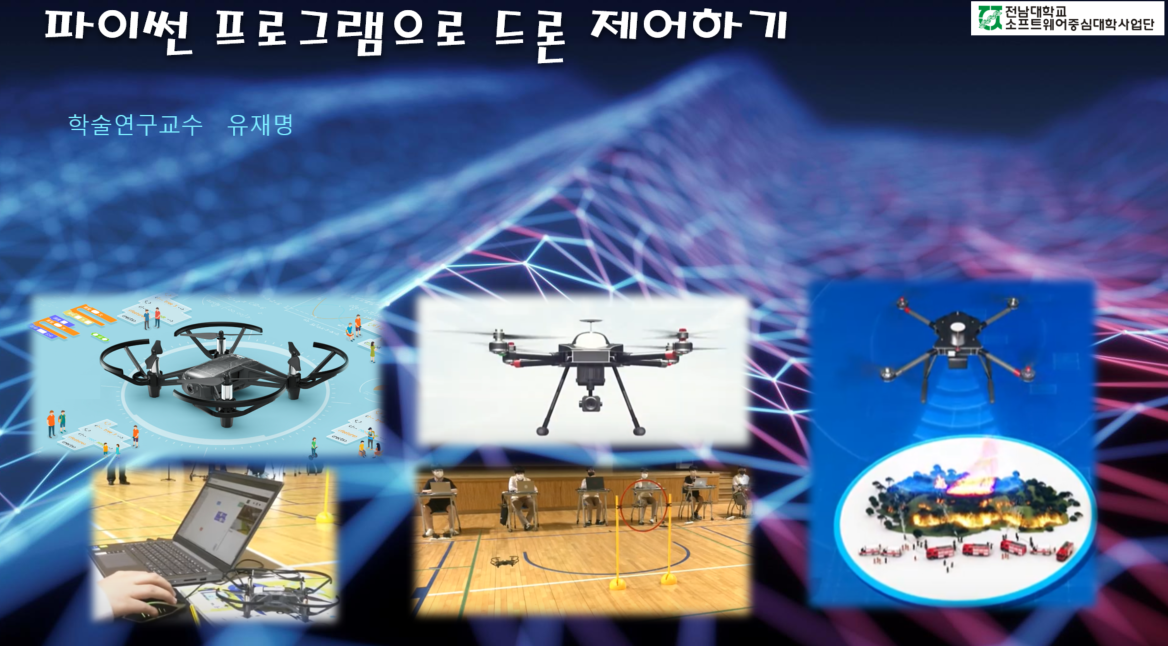  
<hr size=1 width=800px"/>  

# SOCKET 통신

## Socket 이란?
* 특정 포트를 이용하여 데이터를 송수신
* 서버: 서비스 주체
* 클라이언트: 서비스 사용자

## 프로토콜(Protocol)
* 그리스어의 <font color=red><b>Protokollen</b></font> 에서 유래
* Proto(맨처음) + Kollen(붙이다)
* 공증문서(외교문서)의 효력 부여를 위해 문서 맨 앞장에 붙이는 용지를 뜻함
* 국가간 공식행사에서 지켜야 할 일련의 규법
  
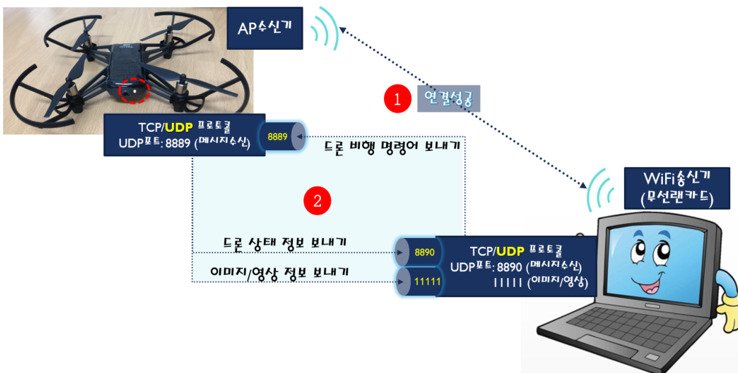  
<hr size=1 width=800px"/>    

# 통신방식(TCP, UDP)

## TCP(Transmission Control Protocol)
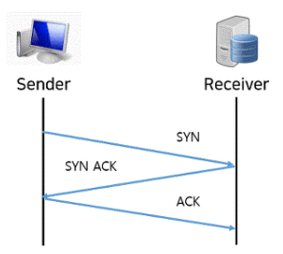    

## UDP(User Datagram Protocol)
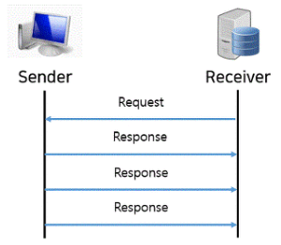  

## TCP, UDP 특징
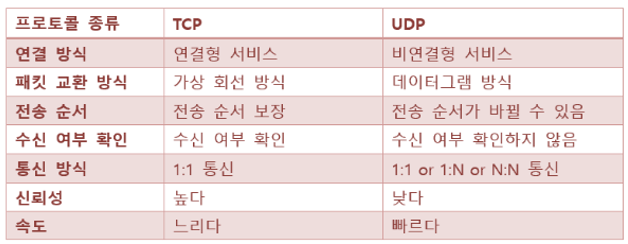

## 드론과 노트북(태블릿) 연결 상태
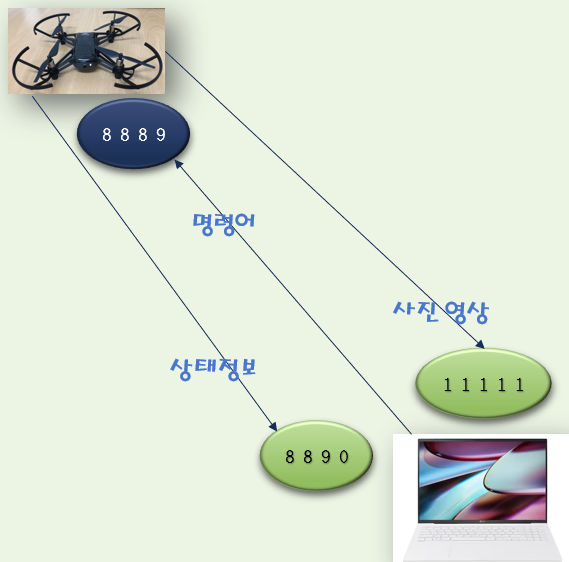  
<hr size=1 width=800px"/>  

## 사용중인 내컴퓨터의 IP확인
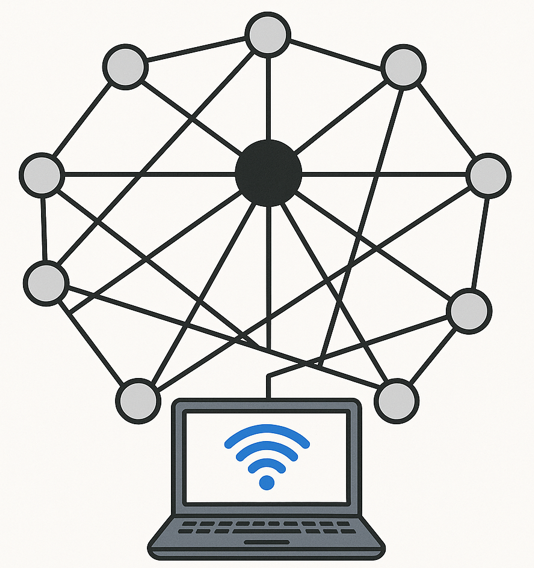  
<b>`아래 코드를 실행하시오`</b>

In [ ]:
!ipconfig

<div style="background-color: #f9f9a9; padding: 2px; border-radius: 1px;">
  &ensp;
</div>

## 랜카드 종류
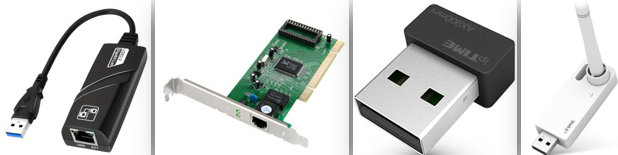  
<hr size=1 width=800px />  

## 네크워크 카드 
* NIC, Network Interface Card에 부여되는 고유 식별 번호
* 48비트: `00-00-00-00-00-00`
  > 앞 3바이트:OUI(Organizationally Unique Identifier), 제조사 식별  
  > 뒤 3바이트:NIC고유번호로 제조사 내부적으로 부여하는 일련번호
* 이더넷(유선), Wi-Fi(무선), 블루투스 등에서 사용
* 이더넷 프레임 구조

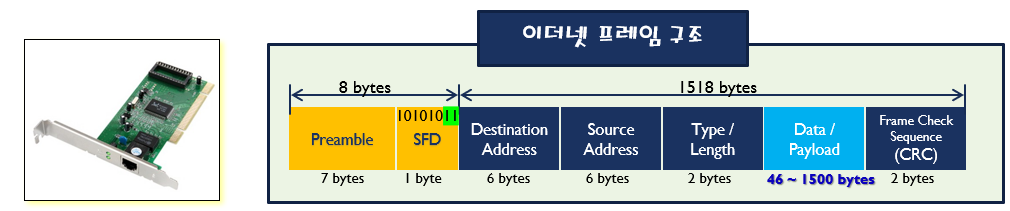  

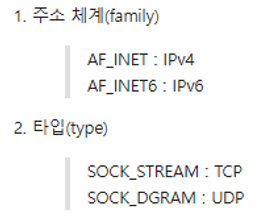  
### 아래 코드 <b>`UDP서버 실행` <font color=red>▼</font></b> 

In [ ]:
#통신 모듈 : UDP서버
import socket
#주소 설정
local_addr = ('0.0.0.0',60889)
#udp서버 구성
server_sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
server_sock.bind(local_addr) # socket 주소 정보 할당

print('[서버 메시지 수신대기]')
data, address = server_sock.recvfrom(1024)
print('[서버 메시지 수신완료]:'+data.decode(encoding='utf-8')+" by "+str(address));                        

#통신 종료
server_sock.close()
print('서버 프로그램 종료')

### <b>`UDP서버 실행`</b> 후<br><a href="2_2.UDP클라이언트.ipynb"><font color='red'>2_2.UDP클라이언트.ipynb</font></a>로 이동하여 `UDP클라이언트` 실행하시오  

<div style="background-color: #f9f9a9; padding: 2px; border-radius: 1px;">
  &ensp;
</div>

# Tello 드론 UDP서버

## 아래 코드 `Tello드론 UDP서버`를 실행 <font color=red>▼</font>

In [ ]:
#통신 모듈 : Tello드론 UDP서버
import socket
import time
import threading
global gmsg  # main, thread 전역 변수
global tellomsg # Tello 상태 정보
global run_flag # thread 종료 변수

#주소 설정
tello_addr = ('0.0.0.0',38889) # Tello드론 38889
notebook_addr = ('0.0.0.0',38890) # 노트북 38890

# 메시지 송수신
def send(message,delay):
    try:
        sock.sendto(message.encode(),notebook_addr) # Tello드론->노트북
        print("보낸메시지:" + message)
    except Exception as e:
        print("[tello send]에러 메시지:" + str(e))
    #지연
    time.sleep(delay)        
# notebook -> tello드론 메시지 받기(recvfrom)
def receive():
    global gmsg
    global tellomsg
    global run_flag
    while run_flag:
        try:
            response, ip_addr = sock.recvfrom(1024) # 노트북 -> Tello드론                       
            gmsg = "[notebook]: %s, IP: %s" % (response.decode(encoding='UTF-8'), str(ip_addr))                 
            print(gmsg)
            # (Echo 서비스) tello정보 보내기 
            send("[tello응답] %s ok" % response.decode(encoding='UTF-8'),1)
        except Exception as e:
            print("[tello receive] 에러 메시지:" + str(e))
            break
            
# Tello드론(tello_addr) 통신포트 바인딩
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind(tello_addr)

# 노트북으로부터 메시지 받기 쓰레드 생성 및 시작
run_flag = True
recvThread = threading.Thread(target=receive)
recvThread.daemon = True
recvThread.start()            

# 통신 시작
while True:
    try:
        print('###############################\n■ Tello드론서버는 대기모드\n■ 프로그램 종료: quit\n###############################\n')   
        message = input()
        if 'quit' in message:
            print('프로그램 종료')
            run_flag = False
            recvThread.join()
            sock.close()
            break        
        else:
            send(gmsg,3)
    except KeyboardInterrupt as e:
        sock.close()
        break

## `Tello드론 UDP서버`를 실행된 것 확인 후<br> <a href="2_4.UDP클라이언트(노트북).ipynb"><font color=red>2_4.UDP클라이언트(노트북).ipynb</font></a>로 이동하여 실행하시오.

<div style="background-color: #f9f9a9; padding: 2px; border-radius: 1px;">
  &ensp;
</div>

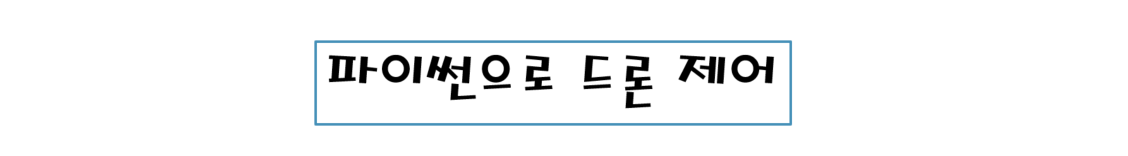

## ✅ 사전 준비

### 1. 필요 사항

* Python 3.x 설치 확인
* 주피터랩 확인( <font color=blue><b>pip install jupyterlab</b></font> )
* Tello EDU 드론 준비 > 전원ON > 대기상태 확인 
* PC 또는 노트북이 **Tello EDU Wi-Fi**에 연결되어 있어야 함 (예: <font color=red><b>TELLO-SW##</b></font> )

### 2. 기본 통신 정보

<span style="display:inline-block;position:left;">

| 항목    | 값              |
| ----- | -------------- |
| 드론(서버) IP 주소 | `192.168.10.1` |
| 드론(서버) 포트 번호 | `8889` (UDP)   |

</span>

### <font color=red>드론과 노트북(태블릿) 연결이 완료</font>된 후 아래 코드를 실행하시오. 

In [ ]:
## ✅ 예제 코드: tello_basic.py
import socket
import time

# Tello 기본 정보
TELLO_IP = '192.168.10.1'
TELLO_PORT = 8889
TELLO_ADDRESS = (TELLO_IP, TELLO_PORT)

# 소켓 생성 및 바인딩
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind(('0.0.0.0', 8890))  # 수신 포트 (로컬)

def send_command(command, delay=3):
    print(f"Sending command: {command}")
    sock.sendto(command.encode('utf-8'), TELLO_ADDRESS)
    try:
        response, _ = sock.recvfrom(1024)
        print(f"Response: {response.decode('utf-8')}")
    except socket.timeout:
        print("No response received.")
    time.sleep(delay)

# 드론 제어 시작 : 아래 주요 명령어 정리를 참조하여 명령어 재구성 : 4각비행, 5각비행, 별비행
send_command("command")    # SDK 모드 진입
send_command("takeoff")    # 이륙
send_command("cw 90")      # 시계 방향으로 90도 회전
send_command("land")       # 착륙

# 소켓 종료
sock.close()

## ✅ 주요 명령어 정리
<span style="display:inline-block;position:left;margin: 1px 1px 1px 20px;">

| 명령어          | 의미           |
| ------------ | ------------ |
| `command`    | SDK 모드 진입    |
| `takeoff`    | 이륙           |
| `land`       | 착륙           |
| `cw 90`      | 시계방향 90도 회전  |
| `ccw 90`     | 반시계방향 90도 회전 |
| `forward 50` | 50cm 전진      |
| `back 50`    | 50cm 후진      |
| `up 30`      | 30cm 상승      |
| `down 30`    | 30cm 하강      |

</span>

<div style="background-color: #f9f9a9; padding: 2px; border-radius: 1px;">
  API 활용하기
</div>

# DJI Drone 제공하는 API를 활용하기

## 사전준비사항
* API 모듈 추가
  > djitellopy 라이브러리 추가:  
  >  `pip install djitellopy`  
  > pip 업데이트:  
  >  `python -m pip install --upgrade pip`
  > 영상 라이브러리 추가:  
  >  `pip install opencv-python`
  > 
* <font color=red>[실습] 아래 기본 예시 코드를 실행하기</font>  

In [ ]:
## djitellopy 라이브러리 추가
!pip install djitellopy            

In [ ]:
## pip 업데이트
!python -m pip install --upgrade pip 

In [ ]:
## 영상 라이브러리 추가
!pip install opencv-python       

# 중요 자료
* <a href="https://djitellopy.readthedocs.io/en/latest/tello/">DJITellopy 매뉴얼 보기</a>
* <a href="https://github.com/damiafuentes/DJITelloPy">DJITellopy 파이썬코드 오픈 소스 보기</a>


## ✈️ 비행 제어 명령어

<span style="display:inline-block;position:left;">

| 메서드                                                   | 설명                                  |                                               |
| ----------------------------------------------------- | ----------------------------------- | --------------------------------------------- |
| `connect()`                                           | 드론과 연결                              |                                               |
| `takeoff()`                                           | 이륙                                  |                                               |
| `land()`                                              | 착륙                                  |                                               |
| `emergency()`                                         | 비상 정지 (모터 즉시 정지)                    |                                               |
| `move_up(x)` / `move_down(x)`                         | x(20 ~ 500 cm) 만큼 상승 / 하강                    |                                               |
| `move_left(x)` / `move_right(x)`                      | x(20 ~ 500 cm) 만큼 좌 / 우 이동                   |                                               |
| `move_forward(x)` / `move_back(x)`                    | x(20 ~ 500 cm) 만큼 전진 / 후진                    |                                               |
| `rotate_clockwise(x)` / `rotate_counter_clockwise(x)` | x(1 ~ 360 도) 만큼 시계 / 반시계 방향 회전              |                                               |
| `flip(direction)`                                     | 지정된 방향으로 플립 (예: 'l', 'r', 'f', 'b') |                                               |
| `go_xyz_speed(x, y, z, speed)`                        | 지정된 좌표로 이동 (cm 단위)<br> x,y,z : -500 ~ 500<br>speed: 10 ~ 100  |                                               |
| `curve_xyz_speed(...)`                                | 곡선 경로로 이동<br>x1,y1,z1,x2,y2,z2: -500 ~ 500<br>speed: 10 ~ 60 |                                               |
| `send_rc_control(lr, fb, ud, yaw)`                    | 실시간 RC 제어 (각 방향 속도 설정)              | 조이스틱 활용 |

</span>


<div style="background-color: #f9f9a9; padding: 2px; border-radius: 1px;">
  API활용 드론 비행(<font color=red>새로 배터리 교체시 필히 처음 한번 실행할 것</font>)
</div>

In [ ]:
# djitellopy 모듈 예시
from djitellopy import Tello
import time
tello = Tello(host='192.168.10.1')
tello.connect()
print(f"Bat : {tello.get_battery()}%")        
tello.takeoff()
tello.rotate_clockwise(360)
tello.land()

<div style="background-color: #f9f9a9; padding: 2px; border-radius: 1px;">
 드론 상태 정보
</div>

In [ ]:
print("■ 드론 상태정보")
print(f"드론상태: {tello.query_active()}")
print(f"Bat: {tello.get_battery()}%")
print(f"SDK버전: {tello.query_sdk_version()}")
print(f"제품번호(SD): {tello.query_serial_number()}")
print(f"현재 상태 dict: {tello.get_current_state()}")
print(f"bat(key) 상태: {tello.get_state_field('bat')}%")       

<div style="background-color: #f9f9a9; padding: 2px; border-radius: 1px;">
  드론 비행 상태 정보
</div>

In [ ]:
print("■ 드론 비행 상태정보")
tello.takeoff()
print(f"Bat: {tello.get_battery()}%")
print(f"높이: {tello.get_height()}")
print(f"pitch,roll,yaw: {tello.query_attitude()}")                     
print(f"비행거리 tof: {tello.get_distance_tof()}")
print(f"비행시간 tof: {tello.get_flight_time()}")
tello.land()

<div style="background-color: #f9f9a9; padding: 2px; border-radius: 1px;">
  드론 비행 : <font color=blue><b>이륙 후 높이를 측정하여 높이 만큼 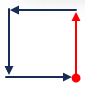상하앞뒤 사각 비행하기 코딩</b></font>
</div>

In [ ]:
tello.takeoff()
h = tello.get_height()
tello.move_up(h)
tello.move_forward(h)                                                                                                       
tello.move_down(h)
tello.move_back(h)
tello.land()

<div style="background-color: #f9f9a9; padding: 2px; border-radius: 1px;">
  드론 비행 : <font color=blue><b>이륙 후 ⓐ 고도 150cm 높이로 비행 후  ⓑ 360도 회전 후 ⓒ 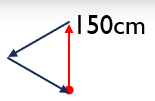 대각선 비행으로 이동 후 착륙하라</b></font>
</div>

In [ ]:
tello.takeoff()
h = tello.get_height()
d = 150 - h
half_d = int(d/2) # 정수값으로 변환                                                                                   
tello.move_up(d)
tello.rotate_counter_clockwise(360)
tello.go_xyz_speed(d,0,-half_d, 30)
tello.go_xyz_speed(-d,0,-half_d, 30)
tello.land()

<div style="background-color: #f9f9a9; padding: 2px; border-radius: 1px;">
  드론 비행 : <font color=blue><b>이륙 후 ⓐ 고도 120cm 높이에서 ⓑ 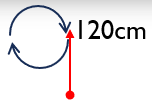 곡선비행 후 착륙하라</b></font>
</div>

In [ ]:
tello.takeoff()
h = tello.get_height()
d = 120 - h
tello.move_up(d)
tello.curve_xyz_speed(50,0,-60,100,0,0,30)                                                                     
tello.curve_xyz_speed(-50,0,60,-100,0,0,30)
tello.land()

<div style="background-color: #f9f9a9; padding: 2px; border-radius: 1px;">
  드론 비행 : <font color=blue><b>이륙 후 ⓐ 고도 120cm 높이에서 ⓑ 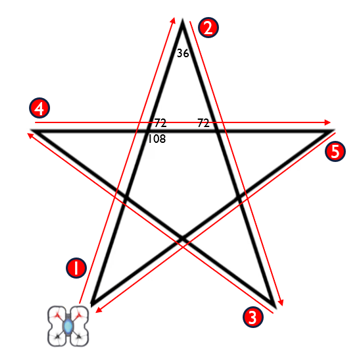별모양 비행(지름: 50cm) 후 착륙하라</b></font>
</div>

In [ ]:
tello.takeoff()
h = tello.get_height()
d = 120 - h
f = 50
angle1=72
angle2=144
tello.move_up(d)
tello.rotate_clockwise(angle1)
for i in range(5):
    tello.move_forward(f)
    tello.rotate_counter_clockwise(angle2)                                                                                   
    
tello.rotate_counter_clockwise(angle1)
tello.land()

<div style="background-color: #f9f9a9; padding: 2px; border-radius: 1px;">
  드론 비행:<font color=blue><b>위 기본 비행를 활용하여 비행 시나리오를 작성 및 완성한 후 발표하기</b></font>
</div>

In [ ]:
# 시나리오 작성